# Assignment 8
### Steven Simonsen
### 5/3/24

### The libraries you will use are already loaded for you below

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain

## Question 1
Read in the two Netflix CSV files from /Data/Netflix as pandas dataframes. Print the number of unique genres. This is not as simple as it sounds. You cannot simply find the length of `titles['genres'].unique()`. You must convert the output of that code to a list, iterate over that list and replace the following characters: `[]',`. Once you have them replace you can split the individual strings to list items and flatten the list. I have already imported the `chain()` function for you to flatten the list. Look up the documentation to see its usage. There are 19 unique genres, but I want you to write the code to find them. 

In [7]:
#Aplogies for absolute path. Jupyter did not like relative path without trying to change working directory.
credits_df = pd.read_csv('C:/Users/steve/OneDrive/Documents/School/DSE5002/Week_8/Data/Netflix/credits.csv')
titles_df = pd.read_csv('C:/Users/steve/OneDrive/Documents/School/DSE5002/Week_8/Data/Netflix/titles.csv')

In [8]:
genres=titles_df['genres']
genre_list = [str(g).replace("[","").replace("]","").replace("'","").replace(",","") for g in genres]

In [9]:
flattened_genres = list(chain(*[g.split() for g in genre_list]))

In [10]:
unique_genres = set(flattened_genres)
print(len(unique_genres))

19


## Question 2
Print the release year and the imdb score of the highest average score of all movies by year. This is trickier than it sounds. To do this you will need to aggregate the means by year. If you use the simple method you will get a pandas series. The series will need to be converted to a dataframe and the index will need to be set as a column (release year). Once you have done that you can find the numerical index with the highest average imdb score. 

In [11]:
titles_df_cleaned = titles_df.dropna(subset=['imdb_score'])

In [12]:
agg_mean_year = titles_df_cleaned.groupby(['release_year']).agg(
    mean_score=('imdb_score', np.mean))

C:\Users\steve\AppData\Local\Temp\ipykernel_29748\234994547.py:1: FutureWarning: The provided callable <function mean at 0x000001F35584D760> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  agg_mean_year = titles_df_cleaned.groupby(['release_year']).agg(


In [13]:
highest_scoring_year=max(agg_mean_year['mean_score'].items(), key=lambda item: item[1])

In [14]:
print(highest_scoring_year)

(1985, 8.0)


## Question 3
There were 208 actors in the movie with the most credited actors. What is the title of that movie? Nulls and NaN values do not count. 

In [15]:
lfjoin_titles_credits = credits_df.merge(titles_df, how='inner', on='id' )

In [16]:
lfjoin_titles_credits = lfjoin_titles_credits.dropna(subset=['name'])

In [17]:
most_actors = lfjoin_titles_credits.groupby('title')['name'].count()

In [18]:
most_actors.sort_values(ascending=False, na_position='first')

title
Les Misérables                   208
The Irishman                     174
Hairspray                        150
Homecoming: A Film by Beyoncé    139
Contagion                        137
                                ... 
FIGHTWORLD                         1
Ravenous                           1
Fary: Hexagone                     1
Felipe Esparza: Bad Decisions      1
Eve's Apple                        1
Name: name, Length: 5386, dtype: int64

In [20]:
#The Movie with the most credited actors is Les Misérables

## Question 4
Which movie has the highest IMDB score for the actor Robert De Niro? What year was it made? Create a kdeplot (kernel density estimation to show the distribution of his IMDB movie scores. 

In [21]:
rd_scores = lfjoin_titles_credits[
    lfjoin_titles_credits["name"] =='Robert De Niro']

In [42]:
rd_scores_sorted = rd_scores.sort_values(by=['imdb_score'], ascending=False)
print(rd_scores_sorted[['title','imdb_score','release_year']].head())
#It was a tie between Taxi Driver (1976) and Once Upon a Time in America (1984)

                             title  imdb_score  release_year
0                      Taxi Driver         8.3          1976
798    Once Upon a Time in America         8.3          1984
1048                    Awakenings         7.8          1990
46481                 The Irishman         7.8          2019
14755      Silver Linings Playbook         7.7          2012


<function matplotlib.pyplot.show(close=None, block=None)>

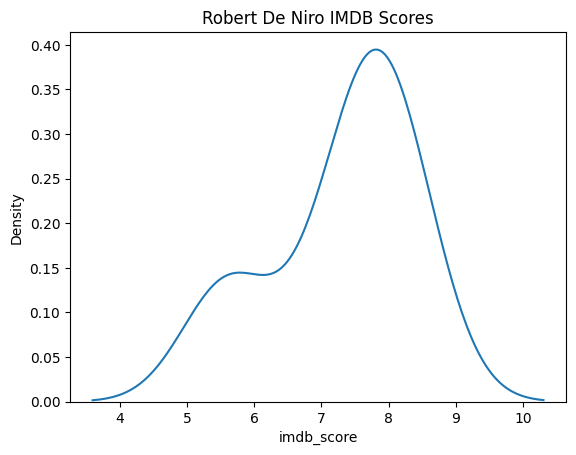

In [33]:
rd_score_plot=sns.kdeplot(data=rd_scores, x="imdb_score")
rd_score_plot.set_title('Robert De Niro IMDB Scores')
plt.show

## Question 5
Create two new boolean columns in the titles dataframe that are true when the description contains war or gangster. Call these columns `war_movies` and `gangster_movies`. How many movies are there in both categories? Which category has a higher average IMDB score? Show the IMDB score kernel density estimations of both categories.


In [34]:
titles_df['war_movies'] = titles_df['description'].str.contains('war')
titles_df['gangster_movies']=titles_df['description'].str.contains('gangster')

In [44]:
count_war = titles_df['war_movies'].sum()
count_gangster = titles_df['gangster_movies'].sum()
print(count_war)
print(count_gangster)
#366 war movies and 33 gangster movies

366
33


In [37]:
imdb_war = titles_df.groupby('war_movies').agg(
    avg_imdb_score=('imdb_score', np.mean))

imdb_gangster = titles_df.groupby('gangster_movies').agg(
    avg_imdb_score=('imdb_score', 'mean'))

print(imdb_war)
print(imdb_gangster)

#War Movies had the higher IMDB score.

            avg_imdb_score
war_movies                
False             6.519060
True              6.753959
                 avg_imdb_score
gangster_movies                
False                  6.535310
True                   6.363636


C:\Users\steve\AppData\Local\Temp\ipykernel_29748\3491419614.py:1: FutureWarning: The provided callable <function mean at 0x000001F35584D760> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  imdb_war = titles_df.groupby('war_movies').agg(


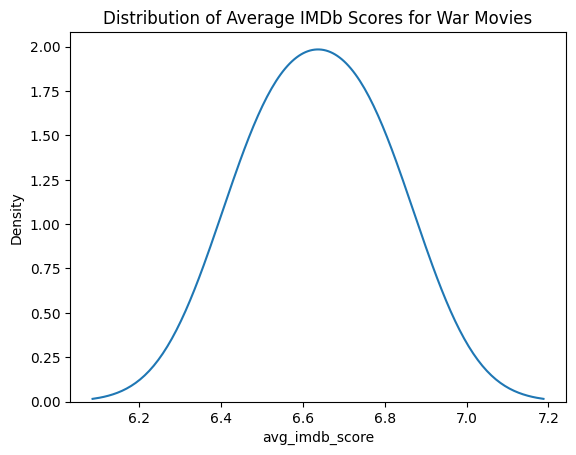

In [38]:
war_plot = sns.kdeplot(data=imdb_war, x='avg_imdb_score')
war_plot.set_title('Distribution of Average IMDb Scores for War Movies')
plt.show()

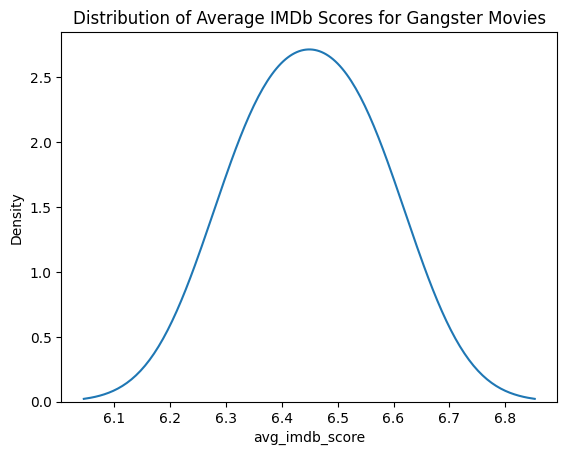

In [39]:
gangster_plot=sns.kdeplot(data=imdb_gangster, x='avg_imdb_score')
gangster_plot.set_title('Distribution of Average IMDb Scores for Gangster Movies')
plt.show()